In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [358]:
df = pd.read_csv('athlete_events.csv')

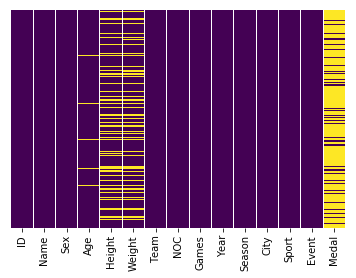

In [359]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis',  yticklabels = False)

In [360]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [403]:
female_tennis = df[(df['Sport'] == 'Tennis') & (df['Sex'] == 'F')]

In [404]:
female_tennis.isnull().sum()

ID           0
Name         0
Sex          0
Age         29
Height     207
Weight     214
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     1038
dtype: int64

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


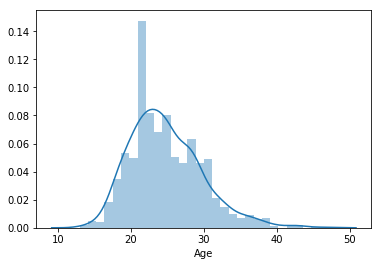

In [405]:
sns.distplot(female_tennis['Age'].dropna(), bins = 30)

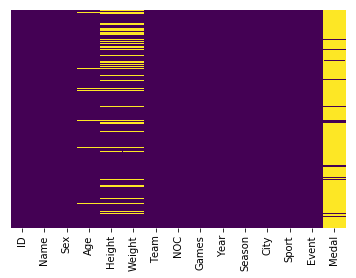

In [406]:
sns.heatmap(female_tennis.isnull(), cbar = False, cmap = 'viridis',  yticklabels = False)

In [407]:
#140 medal winners
female_tennis.count()

ID        1178
Name      1178
Sex       1178
Age       1149
Height     971
Weight     964
Team      1178
NOC       1178
Games     1178
Year      1178
Season    1178
City      1178
Sport     1178
Event     1178
Medal      140
dtype: int64

In [408]:
female_tennis.describe()

,ID,Age,Height,Weight,Year
count,1178.000000,1149.000000,971.000000,964.000000,1178.000000
mean,72839.440577,24.775457,172.335736,62.094398,1989.261460
std,39494.245824,4.933713,6.572871,6.027318,32.764984
min,975.000000,13.000000,150.000000,48.000000,1900.000000
25%,37885.000000,21.000000,168.000000,58.000000,1992.000000
50%,75706.000000,24.000000,172.000000,61.000000,2000.000000
75%,107080.250000,28.000000,176.000000,65.000000,2008.000000
max,135508.000000,47.000000,191.000000,85.000000,2016.000000


In [409]:
female_tennis[(female_tennis['Weight'].isnull()) & (female_tennis['Medal'].dropna())
              & (female_tennis['Height'].isnull())].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1756 to 261701
Data columns (total 15 columns):
ID        55 non-null int64
Name      55 non-null object
Sex       55 non-null object
Age       49 non-null float64
Height    0 non-null float64
Weight    0 non-null float64
Team      55 non-null object
NOC       55 non-null object
Games     55 non-null object
Year      55 non-null int64
Season    55 non-null object
City      55 non-null object
Sport     55 non-null object
Event     55 non-null object
Medal     55 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 6.9+ KB


In [410]:
#changes medal values to 1 or 0 
def medal_change(x):
    if pd.isnull(x) == True:
        return 0
    else:
        return 1
        
    

In [411]:
female_tennis['Medal'] = female_tennis['Medal'].apply(lambda x: medal_change(x))


C:\Users\csmid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


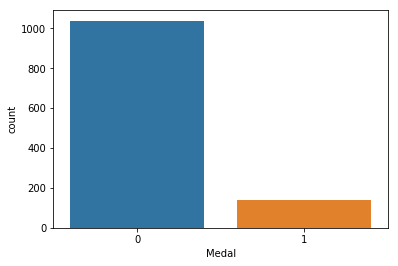

In [412]:
sns.countplot(x = female_tennis['Medal'])

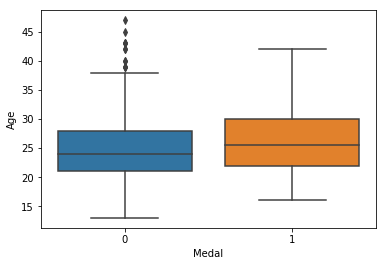

In [413]:
sns.boxplot(x = female_tennis['Medal'], y = female_tennis['Age'])

In [414]:
#change the ages of medalists and non-medalists
def age_modify(col):
    Age = col[0]
    medal = col[1]
    
    if pd.isnull(Age) == True:
        if medal == 0:
            return 24
        else:
            return 25.5
    else:
        return Age


In [415]:
female_tennis['Age'] = female_tennis[['Age', 'Medal']].apply(age_modify, axis = 1)

C:\Users\csmid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


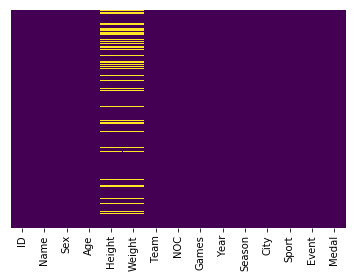

In [416]:
sns.heatmap(female_tennis.isnull(), cbar = False, cmap = 'viridis',  yticklabels = False)

In [417]:
medalists = female_tennis[female_tennis['Medal'] == 1]

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


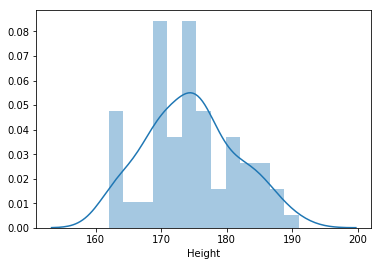

In [377]:
#from distribution, assuming normal
sns.distplot(medalists['Height'].dropna(), bins = 13)

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


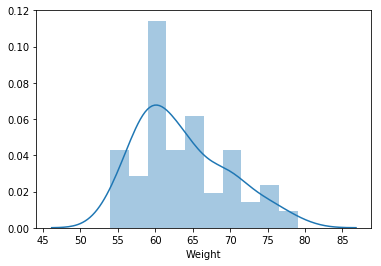

In [378]:
#from distribution, assuming normal
sns.distplot(medalists['Weight'].dropna(), bins = 10)

In [379]:
from numpy.random import normal

In [380]:
#using means and std from heights and averages for the normal distribution
medalists.describe()

,ID,Age,Height,Weight,Year,Medal
count,140.000000,140.000000,85.000000,84.000000,140.000000,140.0
mean,74807.521429,26.014286,174.529412,63.511905,1966.600000,1.0
std,39232.879645,5.411466,6.835809,5.962724,44.464973,0.0
min,975.000000,16.000000,162.000000,54.000000,1900.000000,1.0
25%,42248.000000,22.000000,170.000000,59.000000,1920.000000,1.0
50%,76742.000000,25.500000,175.000000,63.000000,1992.000000,1.0
75%,106052.250000,30.000000,179.000000,68.000000,2004.000000,1.0
max,135508.000000,42.000000,191.000000,79.000000,2016.000000,1.0


In [381]:
height_medal = normal(loc = 174.5294, scale =6.835, size = 1 )

In [382]:
nonmedalists = female_tennis[female_tennis['Medal'] == 0]

In [383]:
nonmedalists.describe()

,ID,Age,Height,Weight,Year,Medal
count,1038.000000,1038.000000,886.000000,880.000000,1038.000000,1038.0
mean,72573.996146,24.595376,172.125282,61.959091,1992.317919,0.0
std,39540.665721,4.774779,6.512317,6.019359,29.576684,0.0
min,1531.000000,13.000000,150.000000,48.000000,1900.000000,0.0
25%,37884.000000,21.000000,168.000000,58.000000,1992.000000,0.0
50%,75272.000000,24.000000,172.000000,61.000000,2000.000000,0.0
75%,107080.250000,28.000000,176.000000,65.000000,2012.000000,0.0
max,135508.000000,47.000000,191.000000,85.000000,2016.000000,0.0


In [384]:
hight_nonmedal =  normal(loc = 172.1252, scale =6.5123, size = 1 )

In [418]:
def normalize_height(col):
    height = col[0]
    medal = col[1]
    
    if pd.isnull(height) == True:
        if medal == 1:
            height = int(normal(loc = 174.5294, scale =6.835, size = 1 ))
            return int(height)
        else:
            height = int(normal(loc = 172.1252, scale =6.5123, size = 1))
            return int(height)        
    else:
        return int(height)

In [419]:
female_tennis['Height'] = female_tennis[['Height', 'Medal']].apply(normalize_height, axis = 1)

C:\Users\csmid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


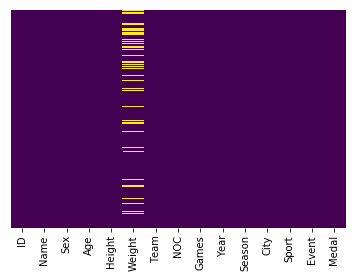

In [420]:
sns.heatmap(female_tennis.isnull(), cbar = False, cmap = 'viridis',  yticklabels = False)

Here is the results of the metrics of the height distribution before and after the transformation. The results are similar, so
I conclude that the data cleansing was effective

In [402]:
female_tennis['Height'].describe()

count    971.000000
mean     172.335736
std        6.572871
min      150.000000
25%      168.000000
50%      172.000000
75%      176.000000
max      191.000000
Name: Height, dtype: float64

In [390]:
female_tennis['Height'].describe()

count    1178.000000
mean      172.395586
std         6.632075
min       150.000000
25%       168.000000
50%       172.000000
75%       177.000000
max       191.000000
Name: Height, dtype: float64

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


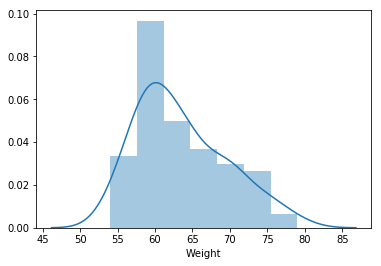

In [422]:
medalists = female_tennis[female_tennis['Medal'] == 1]
sns.distplot(medalists['Weight'].dropna())

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


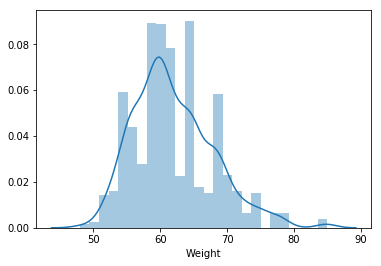

In [423]:
nonmedalists = female_tennis[female_tennis['Medal'] == 0]
sns.distplot(nonmedalists['Weight'].dropna())

In [424]:
medalists['Weight'].describe()

count    84.000000
mean     63.511905
std       5.962724
min      54.000000
25%      59.000000
50%      63.000000
75%      68.000000
max      79.000000
Name: Weight, dtype: float64

In [425]:
nonmedalists['Weight'].describe()

count    880.000000
mean      61.959091
std        6.019359
min       48.000000
25%       58.000000
50%       61.000000
75%       65.000000
max       85.000000
Name: Weight, dtype: float64

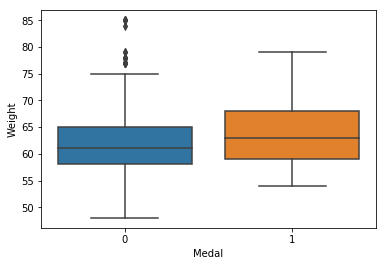

In [426]:
sns.boxplot(x = 'Medal', y = 'Weight', data = female_tennis)

In [427]:
def normalize_weight(col):
    weight = col[0]
    medal = col[1]
    
    if pd.isnull(weight) == True:
        if medal == 1:
            weight = int(normal(loc = 63.5119, scale = 5.96272, size = 1 ))
            return int(weight)
        else:
            weight = int(normal(loc = 61.9590, scale =6.01935, size = 1))
            return int(weight)        
    else:
        return int(weight)

In [428]:
female_tennis['Weight'] = female_tennis[['Weight', 'Medal']].apply(normalize_weight, axis = 1)

C:\Users\csmid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


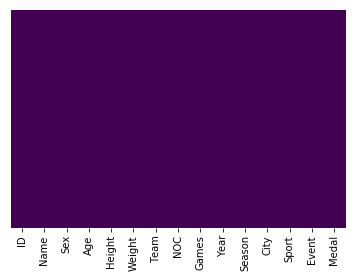

In [429]:
sns.heatmap(female_tennis.isnull(), cbar = False, cmap = 'viridis',  yticklabels = False)

In [430]:
female_tennis.describe()

,ID,Age,Height,Weight,Year,Medal
count,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000
mean,72839.440577,24.764007,172.339559,62.022920,1989.261460,0.118846
std,39494.245824,4.874020,6.629417,6.026871,32.764984,0.323744
min,975.000000,13.000000,150.000000,46.000000,1900.000000,0.000000
25%,37885.000000,21.000000,168.000000,58.000000,1992.000000,0.000000
50%,75706.000000,24.000000,172.000000,61.000000,2000.000000,0.000000
75%,107080.250000,28.000000,177.000000,66.000000,2008.000000,0.000000
max,135508.000000,47.000000,191.000000,85.000000,2016.000000,1.000000


In [449]:
from sklearn.model_selection import train_test_split
X = female_tennis[['Age', 'Height', 'Weight']]
y = female_tennis['Medal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 101)

In [450]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [451]:
from sklearn.metrics import classification_report, confusion_matrix


In [452]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.83      1.00      0.91        98
          1       0.00      0.00      0.00        20

avg / total       0.69      0.83      0.75       118



C:\Users\csmid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [453]:
print(confusion_matrix(y_test, predictions))

[[98  0]
 [20  0]]
